In [92]:
import cv2

pth = "../data/custom_data/R2.jpeg"

import numpy as np
import matplotlib.pyplot as plt


from matplotlib.patches import Rectangle
from cv2 import GaussianBlur,Sobel,erode,dilate

def showImage(img,imfg = True):
    fig,ax = plt.subplots(1,figsize=(25,25))
    ax.imshow(img,cmap = 'gray')
    return ax


img = cv2.cvtColor(cv2.imread(pth,cv2.IMREAD_COLOR),cv2.COLOR_RGB2GRAY)


def get_second_image(img):
    imgb = (img <= 128)*255
    
    imgb = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY, 15, -2)
    #imgb = imgb.astype(np.uint8)
    
    for _ in range(3):
        imgb = GaussianBlur(imgb,(3,3),-1)
    
    imgxy = Sobel(imgb,-1,dx=1,dy=1,ksize=5)

    imgxy = imgxy + imgb 

    for _ in range(3):
        imgxy = GaussianBlur(imgxy,(5,1),-1)

        imgxy = erode(imgxy,np.ones((3,5)),iterations = 2)
        imgxy = dilate(imgxy,np.ones((3,9)),iterations = 2)

        imgxy = ((imgxy > 15)*255).astype(np.uint8)
    return imgxy
    img =  255 - imgxy
    shape = img.shape
    h = max(list(shape))
    l = 50
    print(1,l)

    hk = cv2.getStructuringElement(cv2.MORPH_RECT,(l,1))
    img = erode(img,hk)
    img = dilate(img,hk)
    return 255 - img

<AxesSubplot:>

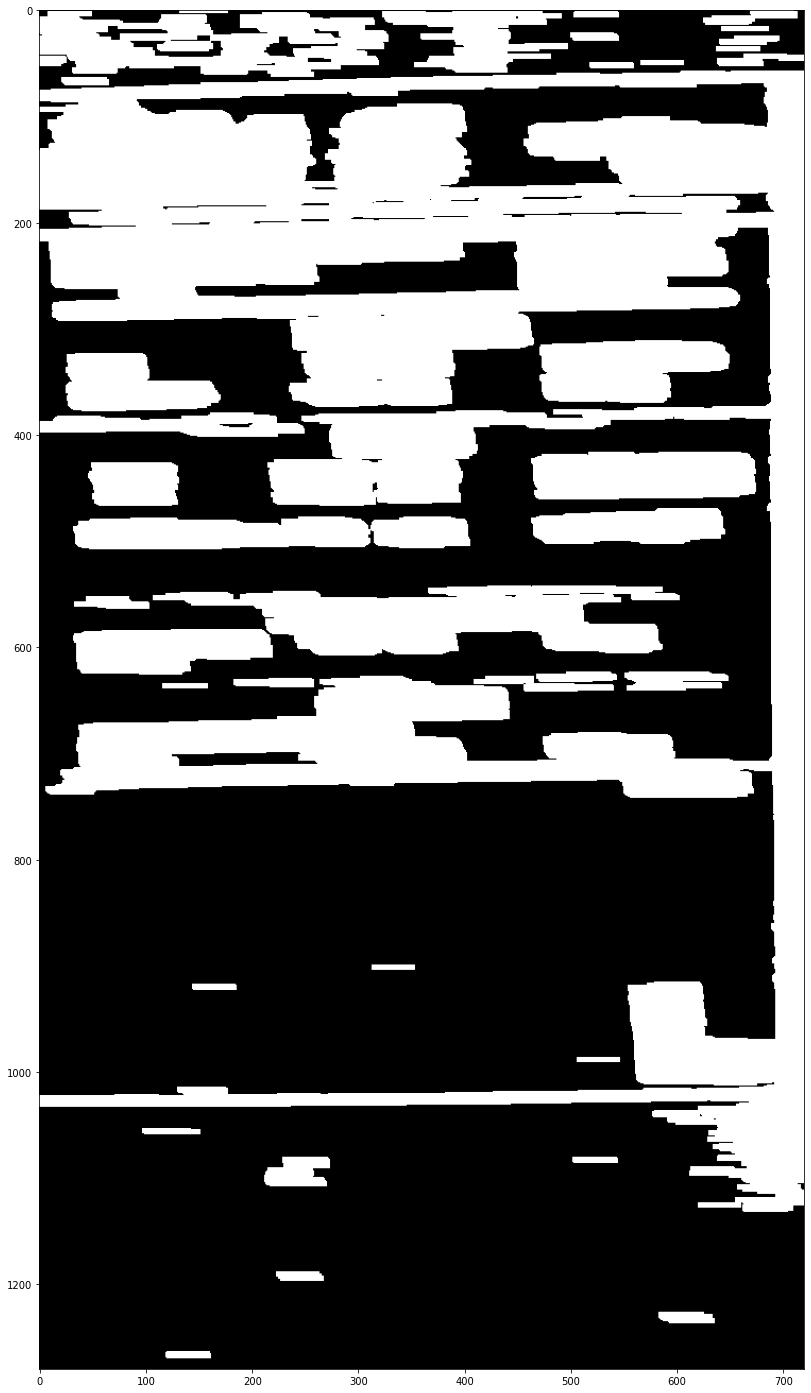

In [93]:
showImage(get_second_image(img))